### Fundamentos de Linguagem Python do Básico a  Aplicação de IA

#### Mini-Projeto 1

##### Análise de Vendas Para Loja de E-commerce com Pandas, Numpy e Matplotlib

**Aprendizado Orientado a Projetos oferecido pela Data Science Academy (DSA)**

datascienceacademy.com.br

**1. Definição do problema de negócio**

A loja de e-commerce está em fase de crescimento, registrando um volume cada vez maior de transações diárias. No entanto,  essa grande quantidade de dados de venda, em seu estado bruto, é com oum baú de tesouros trancado: sabemos que há valor ali mas não conseguimos acessá-lo.

Atualmente, muitas de nossa decisões estratégicas são baseadas em intuição e observações parciais, o que nos leva a enfrentar os seguintes desafios:

    Gestão de estoque ineficiente: Não temos clareza sobre quais produtos são nossos "campeões de venda" e quais estão parados na prateleira. Isso resulta em excesso de estoque de itens de baixa procura e falta de produtos de alta demanda.

    Marketing com baixo retorno: Nossas campanhas de marketiong são genéricas, pois não sabemos quais categorias de produtos atraem mais os clientes ou em quais regiões geográficas nosso público está mais concentrado.

    Perda de oportunidades sazonais: Não conseguimos identificar padrões ou tendências de vendas ao longo dos meses. Isso nos impede de planejar promoções estratégicas para períodos de alta ou de criar ações para impucionar as vendas em meses de baixa.

    Expansão sem direção: Temos o desejo de expandir, mas não sabemos quis mercados regionais são mais promissores ou onde nossos esforços logísticos deveriam ser focados.

    O problema central é a falta de visibilidade clara sobre a performance do negócio, o que nos impede de tomar decisões rápidas, inteligentes e baseadas em evidências.

**1.2. Objetivos do projeto**

    Este projeto de análise de dados visa transformar nossos dados brutos  em insights acionáveis. O objetivo é  responder a quantro perguntas de negócio fundamentais:

    - O que vender? Identificar os produtos de maior sucesso para otimizar o portifólio e estoque.

    - Onde focar: Compreender quais categorias de produtos geram a maior parte da receita.

    - Quando agir? Analisar a performance de vendas ao longo do tempo para identificar tendências, picos e sazonalidades.

    - Para onde expandir? Mapear a distribuição geográfica de nossas vendas para  descobrir nossos mercados mais fortes.

**2. Import das Bibliotecas**

In [1]:
# Instalando o watermark
!pip install -q -U watermark

In [2]:
# Importação das bibliotecas para manipulação de dados em tabelas
import pandas as pd

# Importação da biblioteca Numpy para operações matemáticas e arrays
import numpy as np

# Importação da biblioteca matplotlib para a geração de gráficos
import matplotlib.pyplot as plt

# Importação da biblioteca seaborn para visualização estatística de dados
import seaborn as sns

# Importação da biblioteca Random para geração de números aleatórios
import random

#Importação das classes datetime e timedelta para manipulação de datas e intervalos de tempo
from datetime import datetime, timedelta

# Comando mágico do jupyter notebook para permitir exibir gráficos diretamente no  notebook
%matplotlib inline

In [3]:
%reload_ext watermark
%watermark -a "Leonardo da Silva Neves"

Author: Leonardo da Silva Neves



In [4]:
%watermark --iversions

matplotlib: 3.9.2
numpy     : 1.26.4
pandas    : 2.3.1
seaborn   : 0.12.2



In [5]:
# Para usar uma versão específica de um pacote, podemos fazer assim:
!pip install -q pandas==2.3.1

**3. Função para geração de dados fictícios**

In [6]:
# Definição da função para gerar dados fictícios de vendas
def gera_dados(num_registros = 600):
    """
    Gera um DataFrame do Pandas com dados de venda fictícios
    """
    # Mensagem inicial indicando a quantidade de registros a serem gerados
    print(f"\nIniciando a geração de {num_registros} registros de vendas...")

    # Dicionário com produtos, suas categorias e preços
    produtos = {
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco':7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco':250.00},
        'Teclado Mecânico':{'categoria': 'Acessórios', 'preco':550.00},
        'Monitor Ultrawide':{'categoria': 'Eletrônicos','preco':2000.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    # Cria uma lista apenas com os nomes dos produtos
    lista_produtos = list(produtos.keys())

    # Dicionário com cidades e seus respectivos estados
    cidades_estados = {
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba':'PR', 'Fortaleza':'CE'
    }

    # Cria uma lista apenas com os nomes das cidades
    lista_cidades = list(cidades_estados.keys())

    # Lista que armazenará os registros de vendas
    dados_vendas = []

    # Define a data início dos pedidos
    data_inicial = datetime(2026, 1, 1)

    # Loop para gerar os registros de vendas
    for i in range(num_registros):

        # Seleciona aleatoriamente os produtos
        produto_nome = random.choice(lista_produtos)

        # Selecionando aleatoriamente as cidades
        cidade = random.choice(lista_cidades)

        # Gera uma quantidade de produtos vendidos entre 1 e 7
        quantidade = np.random.randint(1, 8)

        # Calcula a data do pedido a partir da data inicial
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        # Se o produto for mouse ou teclado, aplica um desconto aleatório de até 10%
        if produto_nome in ['Mouse Vertical', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)

        else:
            preco_unitario = produtos[produto_nome]['preco']

        # Adiciona um registro de venda à lista
        dados_vendas.append({
            'ID_Pedido':1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': produto_nome,
            'Categoria': produtos[produto_nome]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100,150),
            'Cidade': cidade,
            'Estado': cidades_estados[cidade]
        })

    # Mensagem final indicando que a geração terminau
    print("Geração de dados concluida.\n")

    # Retorna os dados no formato de DataFrame
    return pd.DataFrame(dados_vendas)

**4. Gerar, Carregar e Explorar os Dados**

In [7]:
# Gerar os dados chamando a função da célula anterior
df_vendas = gera_dados(500)


Iniciando a geração de 500 registros de vendas...
Geração de dados concluida.



In [8]:
# Tipo do objeto
type(df_vendas)

pandas.core.frame.DataFrame

In [9]:
# Shape
df_vendas.shape

(500, 9)

In [10]:
# Exibir as cinco primeiros linhas do dataframe
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 18:00:00,Laptop Gamer,Eletrônicos,7500.00,1,120,Rio de Janeiro,RJ
1,1001,2026-01-01 10:00:00,Teclado Mecânico,Acessórios,521.11,3,146,Rio de Janeiro,RJ
2,1002,2026-01-01 02:00:00,SSD 1TB,Hardware,600.00,5,111,Curitiba,PR
3,1003,2026-01-01 17:00:00,Monitor Ultrawide,Eletrônicos,2000.00,5,127,Salvador,BA
4,1004,2026-01-01 08:00:00,Headset 7.1,Acessórios,800.00,6,144,Porto Alegre,RS


In [11]:
# Exibindo as últimas cinco linhas
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
495,1495,2026-04-10 19:00:00,Monitor Ultrawide,Eletrônicos,2000.0,3,103,Belo Horizonte,MG
496,1496,2026-04-10 11:00:00,Headset 7.1,Acessórios,800.0,2,124,Salvador,BA
497,1497,2026-04-10 23:00:00,SSD 1TB,Hardware,600.0,5,129,Salvador,BA
498,1498,2026-04-10 07:00:00,Monitor Ultrawide,Eletrônicos,2000.0,3,121,Porto Alegre,RS
499,1499,2026-04-10 18:00:00,Cadeira Gamer,Móveis,1200.0,1,102,Porto Alegre,RS


In [12]:
# Exibir informações gerais sobre o dataframe (tipos de dados, valores nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 35.3+ KB


In [13]:
# Resumo estatístico
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.000000
mean,1249.500000,2026-02-19 23:46:26.399999744,2180.278320,3.858000,124.900000
min,1000.000000,2026-01-01 02:00:00,226.030000,1.000000,100.000000
25%,1124.750000,2026-01-26 01:00:00,587.475000,2.000000,112.000000
50%,1249.500000,2026-02-20 01:00:00,1000.000000,4.000000,126.000000
75%,1374.250000,2026-03-16 16:45:00,4500.000000,6.000000,138.000000
max,1499.000000,2026-04-10 23:00:00,7500.000000,7.000000,149.000000
std,144.481833,NaN,2327.331463,2.045043,14.912504


In [14]:
# Tipos de dados
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

**5. Limpeza, Pré-Processamento e Engenharia de Atributos**

In [15]:
# Se a coluna 'Data_Pedido' não estiver com tipo datetime, precisamos fazer a conversão explícita
# A coluna pode ser usada para análise temporal
df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])

In [16]:
# Engenharia de atributos
# Criando a coluna 'Faturamento' (preço x quantidade)
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']

In [17]:
# Engenharia de atributos
# Usando uma função lambda para criar uma coluna de status de entrega
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [18]:
# Exibindo informações gerais sobre o datafreme (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 43.1+ KB


In [19]:
# Exibindo as cinco primeiras linhas novamente para ver as novas colunas
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 18:00:00,Laptop Gamer,Eletrônicos,7500.00,1,120,Rio de Janeiro,RJ,7500.00,Rápida
1,1001,2026-01-01 10:00:00,Teclado Mecânico,Acessórios,521.11,3,146,Rio de Janeiro,RJ,1563.33,Rápida
2,1002,2026-01-01 02:00:00,SSD 1TB,Hardware,600.00,5,111,Curitiba,PR,3000.00,Normal
3,1003,2026-01-01 17:00:00,Monitor Ultrawide,Eletrônicos,2000.00,5,127,Salvador,BA,10000.00,Normal
4,1004,2026-01-01 08:00:00,Headset 7.1,Acessórios,800.00,6,144,Porto Alegre,RS,4800.00,Normal


**6. Análise 1 - Top 10 Produtos Mais Vendidos**

Quais os top 10 produtos mais vendidos?

In [20]:
# Agrupar por nome do produto, soma a quantidade e ordena para encontrar os mais vendidos
top10_produtos_quantidade = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending = False).head(10)

In [21]:
# Exibe o resultado
top10_produtos_quantidade

Nome_Produto
Placa de Vídeo       296
Teclado Mecânico     270
Headset 7.1          257
Monitor Ultrawide    254
SSD 1TB              241
Cadeira Gamer        217
Laptop Gamer         205
Mouse Vertical       189
Name: Quantidade, dtype: int64

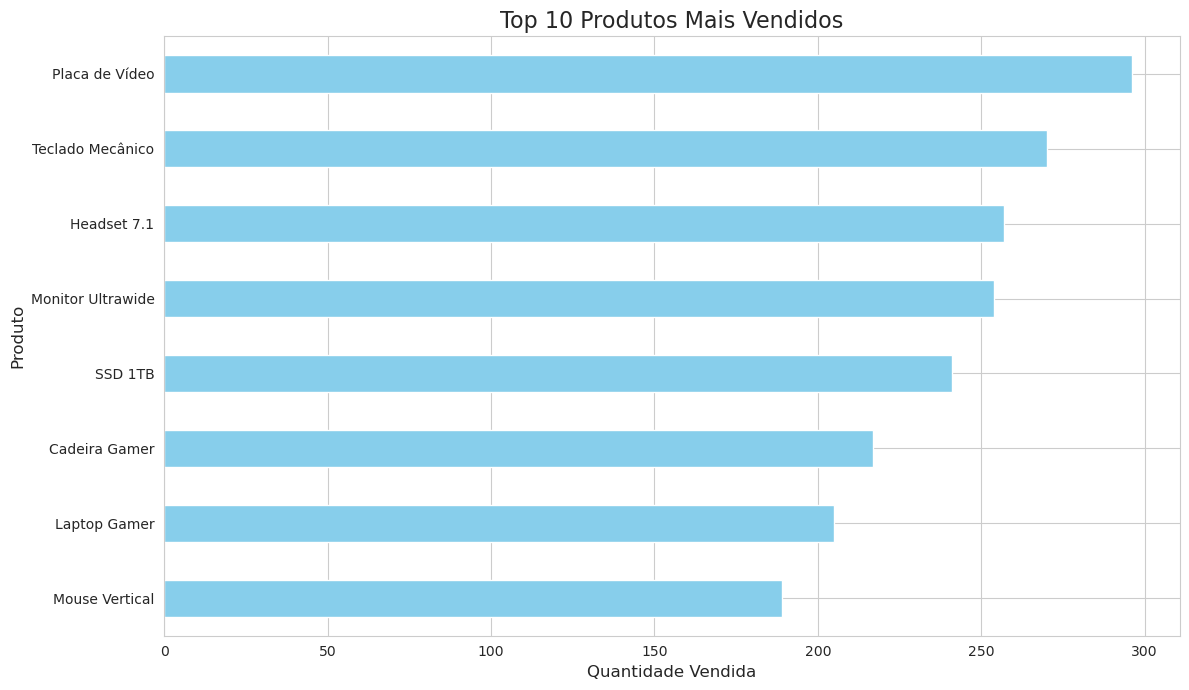

In [22]:
# Define um estilo para os gráficos
sns.set_style("whitegrid")

# Cria a figura e os eixos
plt.figure(figsize=(12, 7))

# Cria um gráfico  de barras horizontais
top10_produtos_quantidade.sort_values(ascending = True).plot(kind = 'barh', color = 'skyblue')

# Adicionando títulos e labels
plt.title("Top 10 Produtos Mais Vendidos", fontsize = 16)
plt.xlabel("Quantidade Vendida", fontsize = 12)
plt.ylabel("Produto", fontsize = 12)

# Exibe o gráfico
plt.tight_layout()
plt.show()

In [23]:
# Agrupando por nome produto, soma o faturamento
top10_produtos_faturamento = df_vendas.groupby('Nome_Produto')['Faturamento'].sum().sort_values(ascending=False).head(10)

In [24]:
top10_produtos_faturamento

Nome_Produto
Laptop Gamer         1537500.00
Placa de Vídeo       1332000.00
Monitor Ultrawide     508000.00
Cadeira Gamer         260400.00
Headset 7.1           205600.00
SSD 1TB               144600.00
Teclado Mecânico      141841.28
Mouse Vertical         44876.10
Name: Faturamento, dtype: float64

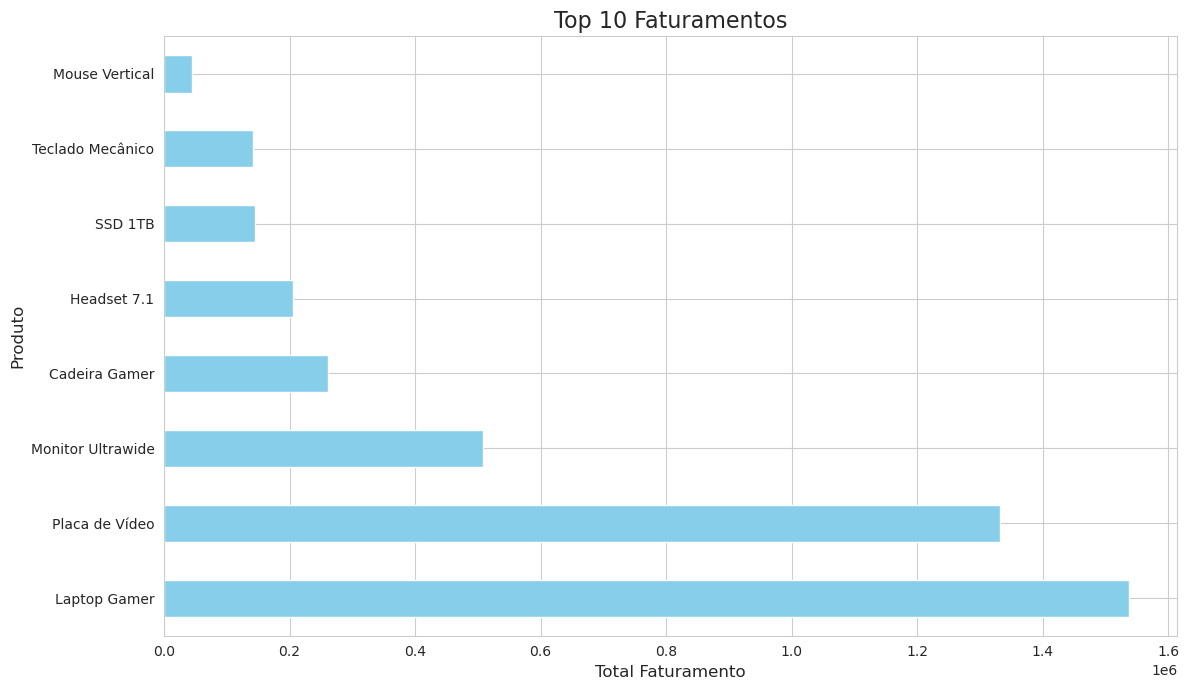

In [25]:
# Defininfo um estilo para o gráfico
sns.set_style("whitegrid")

# figura e eixos
plt.figure(figsize = (12, 7))

# Gráfico de barras horizontais
top10_produtos_faturamento.sort_values(ascending = False).plot(kind = 'barh', color = 'skyblue')

# Adicionando títulos e labels
plt.title("Top 10 Faturamentos", fontsize = 16)
plt.xlabel("Total Faturamento", fontsize = 12)
plt.ylabel("Produto", fontsize = 12)

# Exibe o gráfico
plt.tight_layout()
plt.show()





**7.Análise 2 - Faturamento Mensal**

Qual foi o faturamento mensal?

In [26]:
df_vendas.columns

Index(['ID_Pedido', 'Data_Pedido', 'Nome_Produto', 'Categoria',
       'Preco_Unitario', 'Quantidade', 'ID_Cliente', 'Cidade', 'Estado',
       'Faturamento', 'Status_Entrega'],
      dtype='object')

In [27]:
# Cria uma coluna mês para facilitar o agrupamento mensal
df_vendas['Mes'] = df_vendas['Data_Pedido'].dt.to_period('M')

In [28]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega,Mes
0,1000,2026-01-01 18:00:00,Laptop Gamer,Eletrônicos,7500.00,1,120,Rio de Janeiro,RJ,7500.00,Rápida,2026-01
1,1001,2026-01-01 10:00:00,Teclado Mecânico,Acessórios,521.11,3,146,Rio de Janeiro,RJ,1563.33,Rápida,2026-01
2,1002,2026-01-01 02:00:00,SSD 1TB,Hardware,600.00,5,111,Curitiba,PR,3000.00,Normal,2026-01
3,1003,2026-01-01 17:00:00,Monitor Ultrawide,Eletrônicos,2000.00,5,127,Salvador,BA,10000.00,Normal,2026-01
4,1004,2026-01-01 08:00:00,Headset 7.1,Acessórios,800.00,6,144,Porto Alegre,RS,4800.00,Normal,2026-01


In [29]:
# Agrupa por mês e soma o faturamento
faturamento_mensal = df_vendas.groupby('Mes')['Faturamento'].sum()

In [30]:
# Converte o índice para string para facilitar a plotagem do gráfico
faturamento_mensal.index = faturamento_mensal.index.strftime('%Y-%m')

In [31]:
# Formatação para duas casas decimais
faturamento_mensal.map('R$ {:,.2F}'.format)

Mes
2026-01    R$ 1,101,652.82
2026-02    R$ 1,319,033.54
2026-03    R$ 1,256,750.91
2026-04      R$ 497,380.11
Name: Faturamento, dtype: object

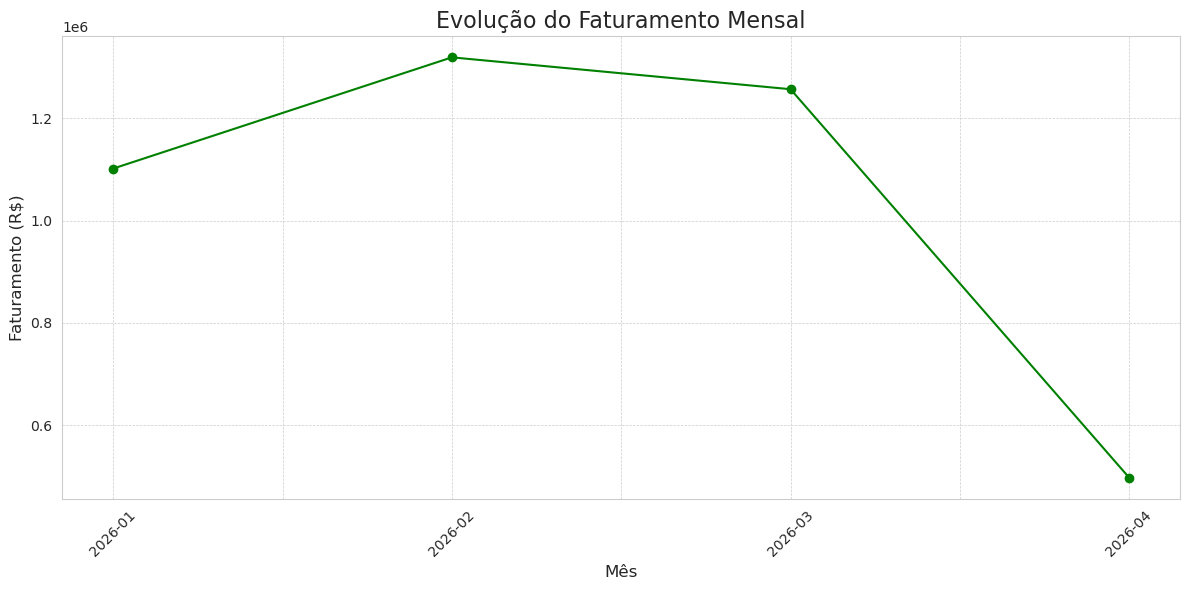

In [32]:
# Criar uma nova figura com tamanho 12 por 6 polegadas
plt.figure(figsize = (12, 6))

# Plota os dados de faturamento mensal em formato de linha
faturamento_mensal.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

# Fonte do gráfico com fonte tamanho 16
plt.title('Evolução do Faturamento Mensal', fontsize = 16)

# Define o rotulo do eixo X
plt.xlabel('Mês', fontsize = 12)

# Define o rotulo do eixo Y
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Rotaciona os valores do eixo X em 45° para melhor visualização
plt.xticks(rotation = 45)

# Adiciona uma grade com estilo tracejado e linhas finas
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

# Ajusta automaticamente os elementos para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

**8. Análise 3 - Vendas Por Estado**

Qual o total de vendas por estado?

In [33]:
# Agrupa por estado e soma o faturamento
vendas_estado = df_vendas.groupby('Estado')['Faturamento'].sum().sort_values(ascending = False)

In [34]:
# Formata para duas casas decimais
vendas_estado.map('R$ {:,.2f}'.format)

Estado
BA    R$ 878,070.96
MG    R$ 834,450.39
RS    R$ 579,636.49
CE    R$ 557,940.06
SP    R$ 462,693.94
RJ    R$ 444,449.12
PR    R$ 417,576.42
Name: Faturamento, dtype: object

https://seaborn.pydata.org/generated/seaborn.color_palette.html

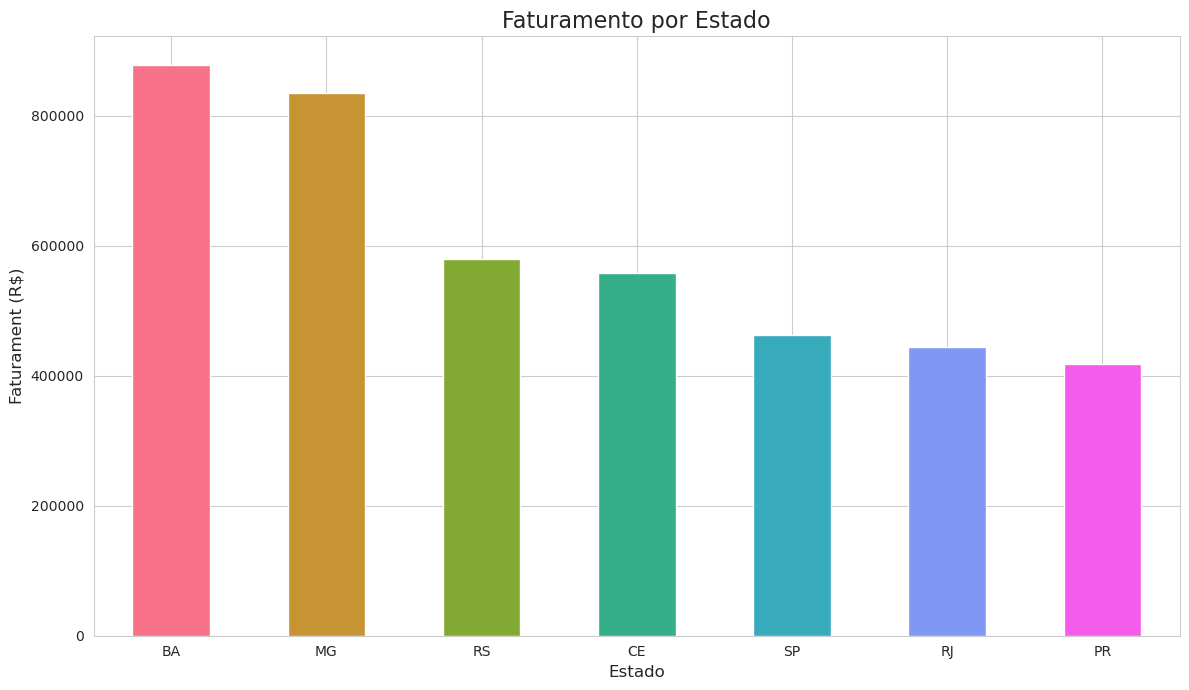

In [35]:
# Criar uma nova figura com tamanho de 12 por 7 polegadas
plt.figure(figsize = (12, 7))

# Plotar os dados de faturamento por estado no formato de gráfico de barras
# Usando a paleta de cores "rocket" do seaborn
vendas_estado.plot(kind = 'bar', color = sns.color_palette("husl", 7))

# Definindo o título do gráfico com fonte tamanho 16
plt.title('Faturamento por Estado', fontsize = 16)

# Define o rótulo do eixo x
plt.xlabel('Estado', fontsize = 12)

# Define o rótulo do eixo y
plt.ylabel('Faturament (R$)', fontsize = 12)

# Manter os rótulos do eixo x na horizontal (sem rotação)
plt.xticks(rotation = 0)

# Ajusta automaticamente os elementos do gráfico para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

**9. Análise 4 - Faturamento Por Categoria**

Qual o faturamento total por categoria?

In [36]:
# Agrupa por categoria, soma o faturamento e formata como moeda para melhor leitura
faturamento_categoria = df_vendas.groupby('Categoria')['Faturamento'].sum().sort_values(ascending = False)

In [37]:
# O .map('{:,.2f}'.format) é opcional, mas deixa a visualização do número mais clara
faturamento_categoria.map('R$ {:,.2f}'.format)

Categoria
Eletrônicos    R$ 2,045,500.00
Hardware       R$ 1,476,600.00
Acessórios       R$ 392,317.38
Móveis           R$ 260,400.00
Name: Faturamento, dtype: object

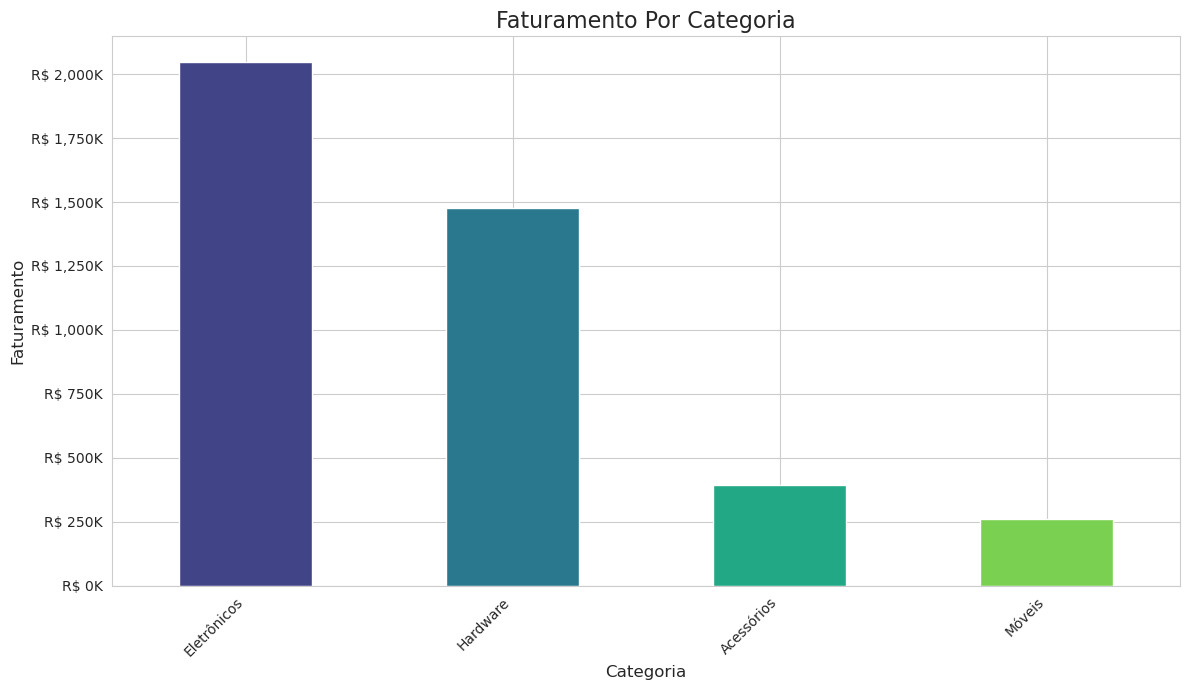

In [38]:
# Importar a função FuncFormatter para formatar os eixos
from matplotlib.ticker import FuncFormatter

# Ordenar os dados para o gráfico ficar mais fácil de ler
faturamento_ordenado = faturamento_categoria.sort_values(ascending = False)

# Cria a figura e os eixos (ax) com plt.subplots()
# Isso nos da mais controle sobre os elementos do gráfico
fig, ax = plt.subplots(figsize = (12, 7))

# Cria uma função para formatar os números
# Esta função recebe um valor 'y' e o transforma o transforma em uma string no formato 'R$ XX K'
def formatador_milhares(y, pos):
    """Formata o valor em milhares (K) com o cifrão R$."""
    return f"R$ {y/1000:,.0f}K"

# Cria o objeto formatador
formatter = FuncFormatter(formatador_milhares)

# Aplicar o formatador ao eixo Y (ax.yaxis)
ax.yaxis.set_major_formatter(formatter)

# Plotar os dados usando o objeto 'ax'
faturamento_ordenado.plot(kind = 'bar', ax = ax, color = sns.color_palette("viridis", len(faturamento_ordenado)))

# Adiciona título e labels usando 'ax.set_...'
ax.set_title("Faturamento Por Categoria", fontsize = 16)
ax.set_xlabel("Categoria", fontsize = 12)
ax.set_ylabel("Faturamento", fontsize = 12)

# Ajusta a rotação dos rótulos do eixo x
plt.xticks(rotation = 45, ha = 'right')

# Garante que tudo fique bem ajustado na imagem final
plt.tight_layout()

# Exibindo o gráfico
plt.show()

**10. Conclusão e Entrega do Resultado**

Existem várias formas de entregar um projeto de análise de dados e a escolha depende do público, do contexto e dos objetivos. Três formas bastantes utilizadas são:

10.1.Relatório Técnico ou Executivo(PDF, DOCX, ets.)

Essa forma é clássica e muito útil quando o público precisa de uma documento formal para consulta. O relatório pode conter descrição da metodologia, exploração dos dados, tabelas e conclusões. É comum separar a linguagem: uma versão mais técnica (com código, estáticas detalhadas e testes) e outra mais executiva (com foco em insights, recomendações e storytelling de dados).

10.2.Dashboard Interativo (POWER BI, TABLEAU, LOOKER, STREAMLIT, DASH, ets.)

Um dashboard permite que o usuário explore os dados por conta própria, filtrando informações, ajustando período de tempo ou focando em várias especificações. Essa forma de entrega é muito valorizada em ambientes corporativos, pois facilita a tomada de decisão continua e não exige conhecimentos técnicos avançados dos usuários finais.

10.3. Apresentação (Slides em PowerPoints, Google Slides, etc.)

Ideal para reuniões de stakeholders, a entrega em formato de apresentação resume os principais pontos do projeto. Ela foca nas descobertas mais relevantes, nas implicações para o negócio e nas recomentações práticas, usando gráficos e visualizações impactantes. A Ideia é contar a história dos dados de forma clara  e direta, evitando sobrecarregar o público com detalhes técnicos.

### Fim